In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('multiple_linear_regression.csv')
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data = data.dropna() 
data.shape

(200, 4)

In [6]:
# splitting input 
x  = data.iloc[: , data.columns != "Target"]
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
# output 
y = data.loc[: , "Target"] 
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [9]:
# splitting dataset into training dataset and testing dataset using sklearn 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.30 , random_state = 43) 

In [10]:
x_train.shape 

(140, 3)

In [11]:
x_test.shape 

(60, 3)

In [12]:
y_train.shape 

(140,)

In [13]:
y_test.shape 

(60,)

<h1 style="color : gray ; font-weight : 500; ">Linear Regression</h1>

<h2 style="color : dimgray;">Training</h2>

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train ) 

LinearRegression()

In [15]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [16]:
lr.intercept_

3.077774495528047

<h2 style="color : dimgray ; " >Prediction</h2>

In [17]:
pred_value = lr.predict(x_test) 


<h2 style="color : dimgray ; " >Cost</h2>

In [18]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)
cost 

2.241286253093347

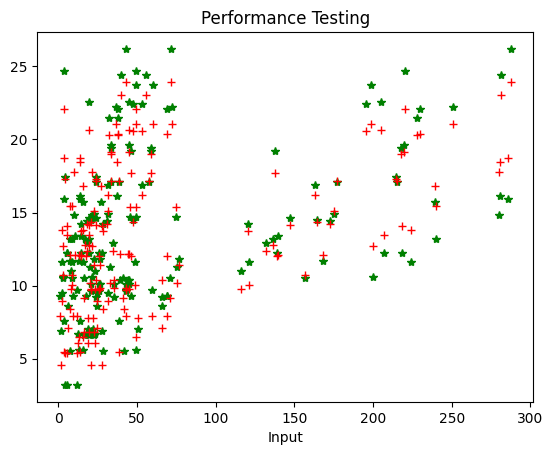

In [20]:
# plotting actual data set ---> green 
plt.plot(x_test , y_test , '*', color = "green")
# plotting predicted data set ---> red 
plt.plot(x_test, pred_value , '+', color = 'red') 
plt.title('Performance Testing') 
plt.xlabel('Input') 
plt.show()